In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 10)

In [2]:
train = pd.read_csv('data/credit_train.csv.zip', encoding='cp1251', delimiter=';', index_col='client_id')
train.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
client_id,,,,,,,,,,,,,,
1,M,48,MAR,UMN,"59998,00",10,1.6,"0,770249",GRD,КРАСНОДАРСКИЙ КРАЙ,30000.0,1.0,1.0,0
2,F,28,MAR,UMN,"10889,00",6,1.1,"0,248514",GRD,МОСКВА,43000.0,2.0,0.0,0
3,M,32,MAR,SPC,"10728,00",12,1.1,"0,459589",SCH,ОБЛ САРАТОВСКАЯ,23000.0,5.0,0.0,0
4,F,27,DIV,SPC,"12009,09",12,1.1,"0,362536",GRD,ОБЛ ВОЛГОГРАДСКАЯ,17000.0,2.0,0.0,0
5,M,45,MAR,SPC,"16908,89",10,1.1,"0,421385",SCH,ЧЕЛЯБИНСКАЯ ОБЛАСТЬ,25000.0,1.0,0.0,0


In [3]:
test = pd.read_csv('data/credit_test.csv.zip', encoding='cp1251', delimiter=';', index_col='client_id')
test.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count
client_id,,,,,,,,,,,,,
170747,F,48,MAR,UMN,"16558,00",10,1.10,"0,370409",GRD,ХАКАСИЯ РЕСП,34000,2.0,0.0
170748,M,29,MAR,SPC,"7028,72",6,1.40,"0,377281",SCH,ОБЛ КЕМЕРОВСКАЯ,19000,3.0,0.0
170749,F,20,UNM,SPC,"13019,00",10,1.60,"0,538515",SCH,ОБЛ БЕЛГОРОДСКАЯ,25000,1.0,0.0
170750,F,41,MAR,SPC,"9379,00",10,1.10,"0,482520",GRD,ОБЛ ИРКУТСКАЯ,30000,0.0,0.0
170751,F,31,MAR,SPC,"13990,00",6,1.43,"0,485914",GRD,ОБЛ КИРОВСКАЯ,20000,2.0,0.0


In [72]:
all_data = pd.concat([train, test])
all_data.describe()

,age,credit_count,credit_month,monthly_income,open_account_flg,overdue_credit_count,tariff_id
count,262686.000000,248753.000000,262686.000000,262685.000000,170746.000000,248753.000000,262686.000000
mean,36.484628,2.107552,10.980954,40118.979904,0.176028,0.045997,1.323828
std,10.534205,1.774774,3.541896,24907.802693,0.380845,0.211371,0.235725
min,18.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000
25%,28.000000,1.000000,10.000000,25000.000000,0.000000,0.000000,1.100000
50%,34.000000,2.000000,10.000000,35000.000000,0.000000,0.000000,1.320000
75%,43.000000,3.000000,12.000000,50000.000000,0.000000,0.000000,1.600000
max,71.000000,22.000000,36.000000,950000.000000,1.000000,3.000000,1.960000


In [5]:
def fix_numbers(data):
    # Как оказалось в данных проблемы с форматом чисел. Вместо точки использовалась запятая, поэтому получили мы строки а не float.
    data['credit_sum'] = pd.to_numeric(data['credit_sum'].str.replace(',', '.'))
    data['score_shk'] = pd.to_numeric(data['score_shk'].str.replace(',', '.'))
    # ИД тарифа оказалось число типа float, переделаем в строку
    data['tariff_id'] = data['tariff_id'].astype(str).str.replace('.', ',')

In [73]:
all_data['monthly_income'] = all_data['monthly_income'].fillna(35000) # медиана 50%
fix_numbers(all_data)
all_data.count()

age                     262686
credit_count            248753
credit_month            262686
credit_sum              262686
education               262686
gender                  262686
job_position            262686
living_region           262378
marital_status          262686
monthly_income          262686
open_account_flg        170746
overdue_credit_count    248753
score_shk               262686
tariff_id               262686
dtype: int64

In [74]:
# данные, которые заполнены не полностью. Заменить 0 все численные. Москвой жилой район.
def null_data_count(data):
    return [(i,data['age'].count() - v) for i, v in data.count().iteritems() if v < data['age'].count()]
print(null_data_count(test))
print(null_data_count(train))
print(null_data_count(all_data))

[('living_region', 116), ('credit_count', 4703), ('overdue_credit_count', 4703)]
[('living_region', 192), ('monthly_income', 1), ('credit_count', 9230), ('overdue_credit_count', 9230)]
[('credit_count', 13933), ('living_region', 308), ('open_account_flg', 91940), ('overdue_credit_count', 13933)]


In [11]:
data_dirty = all_data[['gender','age','marital_status','job_position','credit_sum','credit_month','tariff_id','score_shk','education','living_region','monthly_income']]
print(null_data_count(data_dirty))

[('living_region', 308)]


In [14]:
regions = pd.read_csv('data/locations.csv', index_col='living_region')
print(len(regions.index.unique()))
print(len(regions['living_region_clean'].unique()))
print(len(regions['lon'].unique()))
print(len(regions['lat'].unique()))

317
83
102
102


In [17]:
data = pd.merge(data_dirty, regions, how='left', left_on='living_region', right_index=True).drop(['living_region'], axis=1)
print(data.shape)
print(null_data_count(data))
data.head()

(262686, 13)
[('living_region_clean', 308), ('lon', 308), ('lat', 308)]


,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,monthly_income,living_region_clean,lon,lat
client_id,,,,,,,,,,,,,
1,M,48,MAR,UMN,59998.00,10,"1,6",0.770249,GRD,30000.0,КРАСНОДАРСКИЙ,38.951409,45.272365
2,F,28,MAR,UMN,10889.00,6,"1,1",0.248514,GRD,43000.0,МОСКОВСКАЯ,37.617635,55.755814
3,M,32,MAR,SPC,10728.00,12,"1,1",0.459589,SCH,23000.0,САРАТОВСКАЯ,46.797223,51.578529
4,F,27,DIV,SPC,12009.09,12,"1,1",0.362536,GRD,17000.0,ВОЛГОГРАДСКАЯ,44.151406,49.615821
5,M,45,MAR,SPC,16908.89,10,"1,1",0.421385,SCH,25000.0,ЧЕЛЯБИНСКАЯ,60.395641,54.446199


In [18]:
data.describe()

,age,credit_sum,credit_month,score_shk,monthly_income,lon,lat
count,262686.000000,262686.000000,262686.000000,262686.000000,262686.000000,262378.000000,262378.000000
mean,36.484628,26085.632789,10.980954,0.469402,40118.960417,54.839537,55.350682
std,10.534205,16232.403518,3.541896,0.124390,24907.757286,25.424647,5.309170
min,18.000000,2736.000000,3.000000,0.000000,0.000000,21.229930,42.869937
25%,28.000000,14889.000000,10.000000,0.379387,25000.000000,37.617635,53.276350
50%,34.000000,21201.530000,10.000000,0.461439,35000.000000,44.634151,55.755814
75%,43.000000,32029.000000,12.000000,0.552274,50000.000000,61.530761,58.586755
max,71.000000,200000.000000,36.000000,1.255892,950000.000000,174.432311,67.714212


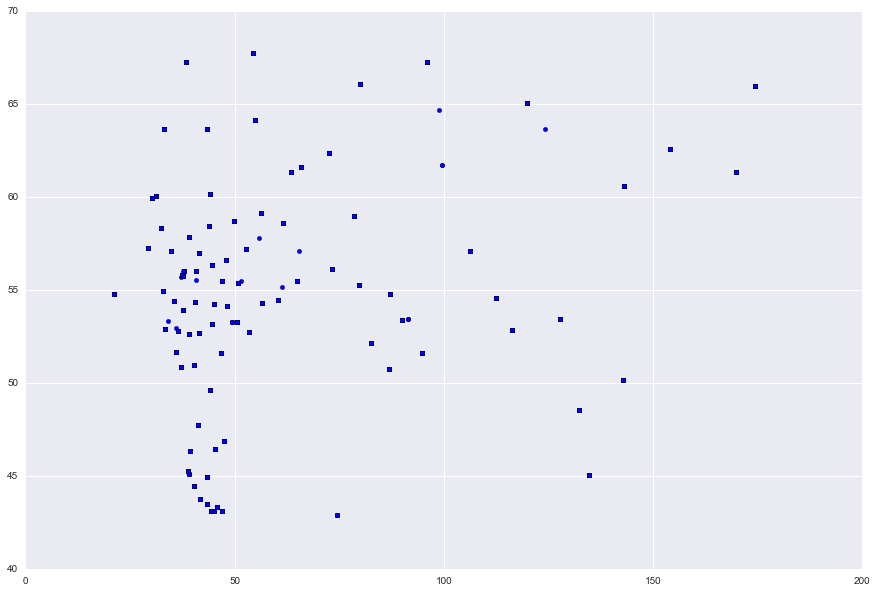

In [30]:
plt.scatter(data['lon'], data['lat'])

In [33]:
from sklearn.preprocessing import LabelEncoder
d = pd.DataFrame(index=data.index)
for cat in ['gender', 'marital_status', 'job_position', 'tariff_id', 'education']:
    d[cat] = LabelEncoder().fit_transform(data[cat])
for cat in ['age', 'credit_sum', 'credit_month', 'score_shk', 'monthly_income']:
    d[cat] = data[cat]
d['lat'] = data['lat']
d['lon'] = data['lon']
d.head()

,gender,marital_status,job_position,tariff_id,education,age,credit_sum,credit_month,score_shk,monthly_income,lat,lon
client_id,,,,,,,,,,,,
1,1,2,14,26,1,48,59998.00,10,0.770249,30000.0,45.272365,38.951409
2,0,2,14,1,1,28,10889.00,6,0.248514,43000.0,55.755814,37.617635
3,1,2,13,1,3,32,10728.00,12,0.459589,23000.0,51.578529,46.797223
4,0,1,13,1,1,27,12009.09,12,0.362536,17000.0,49.615821,44.151406
5,1,2,13,1,3,45,16908.89,10,0.421385,25000.0,54.446199,60.395641


In [36]:
train_city = d[d['lat'].isnull() == False]
test_city = d[d['lat'].isnull()].drop(['lat', 'lon'], axis=1)

x = train_city.drop(['lon', 'lat'], axis = 1)
y_lat = train_city['lat'] 
y_lon = train_city['lon'] 

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

def testRegression(clf, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    return r2_score(y_test, pred)

In [48]:
%%time
testRegression(GradientBoostingRegressor(n_estimators=300), x, y_lat)

CPU times: user 58.1 s, sys: 1.35 s, total: 59.5 s
Wall time: 1min 2s


0.073291946951930531

In [47]:
testRegression(KNeighborsRegressor(n_neighbors=100), x, y_lat)

0.033631836327627673

In [44]:
testRegression(LinearRegression(normalize=True), x, y_lat)

0.035543127801326291

In [51]:
%%time
testRegression(RandomForestRegressor(n_estimators=100), x, y_lat)

CPU times: user 2min 19s, sys: 4.21 s, total: 2min 23s
Wall time: 2min 40s


0.0596582981094399

In [53]:
%%time
clf = GradientBoostingRegressor(n_estimators=300)
clf.fit(x, y_lat)
lat_predict = clf.predict(test_city)

CPU times: user 1min 38s, sys: 3.21 s, total: 1min 41s
Wall time: 1min 49s


In [54]:
%%time
clf = GradientBoostingRegressor(n_estimators=300)
clf.fit(x, y_lon)
lon_predict = clf.predict(test_city)

CPU times: user 1min 38s, sys: 2.6 s, total: 1min 40s
Wall time: 1min 55s


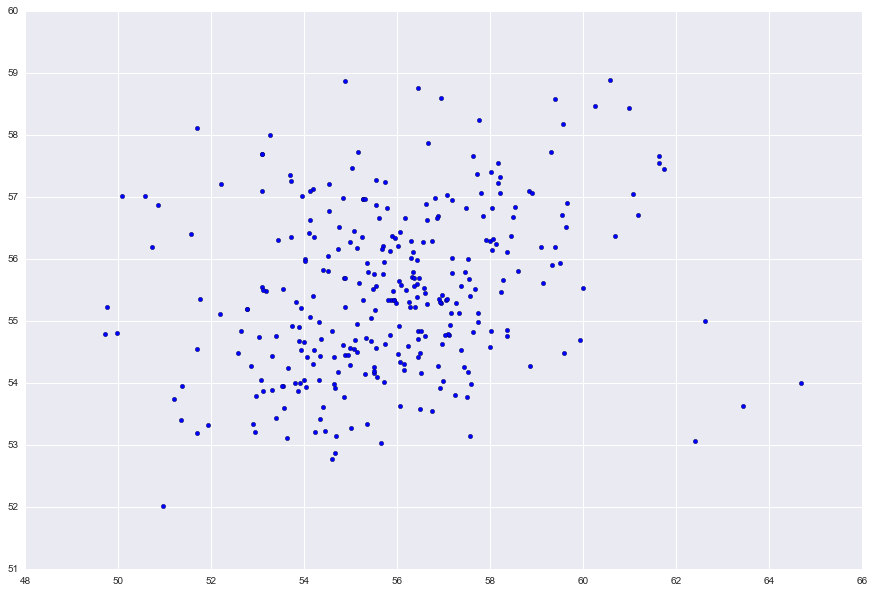

In [56]:
plt.scatter(lon_predict, lat_predict)

In [60]:
locations_pred = pd.DataFrame(index=test_city.index)
locations_pred['lat'] = lat_predict
locations_pred['lon'] = lon_predict
locations_pred.describe()

,lat,lon
count,308.000000,308.000000
mean,55.467744,55.844987
std,1.323876,2.377630
min,52.007666,49.707247
25%,54.480774,54.296555
50%,55.371727,55.788364
75%,56.362841,57.170063
max,58.886846,64.688986


In [63]:
locations = pd.DataFrame(index=train_city.index)
locations['lat'] = train_city['lat']
locations['lon'] = train_city['lon']
locations.describe()

,lat,lon
count,262378.000000,262378.000000
mean,55.350682,54.839537
std,5.309170,25.424647
min,42.869937,21.229930
25%,53.276350,37.617635
50%,55.755814,44.634151
75%,58.586755,61.530761
max,67.714212,174.432311


In [64]:
locations_all = pd.concat([locations, locations_pred])
locations_all.describe()

,lat,lon
count,262686.000000,262686.000000
mean,55.350819,54.840716
std,5.306251,25.409891
min,42.869937,21.229930
25%,53.276350,37.617635
50%,55.755814,44.634151
75%,58.586755,61.530761
max,67.714212,174.432311


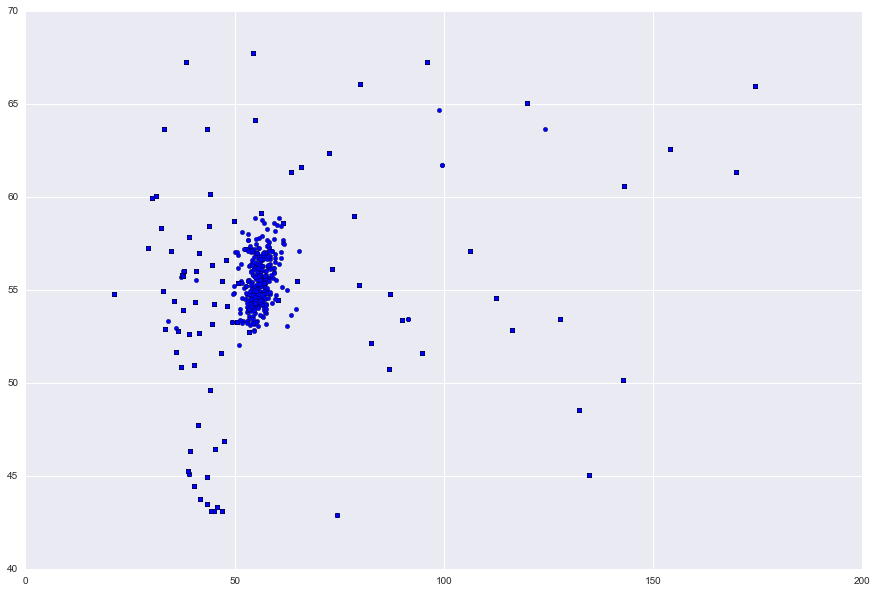

In [65]:
plt.scatter(locations_all['lon'], locations_all['lat'])

In [77]:
full_data = pd.concat([all_data, locations_all], axis = 1).drop(['living_region'], axis = 1)
full_data.head()

,age,credit_count,credit_month,credit_sum,education,gender,job_position,marital_status,monthly_income,open_account_flg,overdue_credit_count,score_shk,tariff_id,lat,lon
client_id,,,,,,,,,,,,,,,
1,48,1.0,10,59998.00,GRD,M,UMN,MAR,30000.0,0.0,1.0,0.770249,"1,6",45.272365,38.951409
2,28,2.0,6,10889.00,GRD,F,UMN,MAR,43000.0,0.0,0.0,0.248514,"1,1",55.755814,37.617635
3,32,5.0,12,10728.00,SCH,M,SPC,MAR,23000.0,0.0,0.0,0.459589,"1,1",51.578529,46.797223
4,27,2.0,12,12009.09,GRD,F,SPC,DIV,17000.0,0.0,0.0,0.362536,"1,1",49.615821,44.151406
5,45,1.0,10,16908.89,SCH,M,SPC,MAR,25000.0,0.0,0.0,0.421385,"1,1",54.446199,60.395641


In [78]:
full_data.count()

age                     262686
credit_count            248753
credit_month            262686
credit_sum              262686
education               262686
gender                  262686
job_position            262686
marital_status          262686
monthly_income          262686
open_account_flg        170746
overdue_credit_count    248753
score_shk               262686
tariff_id               262686
lat                     262686
lon                     262686
dtype: int64

In [80]:
data = pd.get_dummies(data=full_data, columns=['gender', 'marital_status', 'job_position', 'tariff_id', 'education']).drop(['open_account_flg'], axis=1)
train_credit = data[data['credit_count'].isnull() == False]
test_credit = data[data['credit_count'].isnull()].drop(['credit_count', 'overdue_credit_count'], axis = 1)

x_train_credit = train_credit.drop(['credit_count', 'overdue_credit_count'], axis = 1)

y_train_credit_count = train_credit['credit_count']
y_train_credit_overdue = train_credit['overdue_credit_count']

In [82]:
%%time
testRegression(GradientBoostingRegressor(n_estimators=300), x_train_credit, y_train_credit_count)

CPU times: user 2min 35s, sys: 3.6 s, total: 2min 38s
Wall time: 3min 3s


0.085616468608277208

In [83]:
def predict(clf, X, y, test_x):
    clf.fit(X, y)
    return clf.predict(test_x)

In [84]:
pred_credit_overdue = predict(GradientBoostingRegressor(n_estimators=300), x_train_credit, y_train_credit_overdue, test_credit)
print(pred_credit_overdue)
pred_credit_count = predict(GradientBoostingRegressor(n_estimators=300), x_train_credit, y_train_credit_count, test_credit)
print(pred_credit_count)

[ 0.00056109  0.24113425  0.12167369 ...,  0.05816883  0.01022093
  0.06397705]
[ 1.24830878  2.44596279  2.34907192 ...,  1.11048832  2.25762509
  1.58536088]


In [85]:
credit_pred = pd.DataFrame(index=test_credit.index)
credit_pred['overdue_credit_count'] = pred_credit_overdue
credit_pred['credit_count'] = pred_credit_count
credit_pred[credit_pred < 0] = 0
credit_pred.head()

,overdue_credit_count,credit_count
client_id,,
26,0.000561,1.248309
51,0.241134,2.445963
53,0.121674,2.349072
73,0.000000,1.085428
75,0.052804,1.218305


In [86]:
credit = pd.DataFrame(index=train_credit.index)
credit['overdue_credit_count'] = train_credit['overdue_credit_count']
credit['credit_count'] = train_credit['credit_count']
credit.head()

,overdue_credit_count,credit_count
client_id,,
1,1.0,1.0
2,0.0,2.0
3,0.0,5.0
4,0.0,2.0
5,0.0,1.0


In [87]:
all_credit = pd.concat([credit, credit_pred])
all_credit.describe()

,overdue_credit_count,credit_count
count,262686.000000,262686.000000
mean,0.045915,2.072175
std,0.206077,1.738229
min,0.000000,0.000000
25%,0.000000,1.000000
50%,0.000000,2.000000
75%,0.000000,3.000000
max,3.000000,22.000000


In [88]:
entire_all_data_full = pd.concat([full_data.drop(['overdue_credit_count', 'credit_count'], axis = 1),all_credit], axis = 1)
entire_all_data_full.head()

,age,credit_month,credit_sum,education,gender,job_position,marital_status,monthly_income,open_account_flg,score_shk,tariff_id,lat,lon,overdue_credit_count,credit_count
client_id,,,,,,,,,,,,,,,
1,48,10,59998.00,GRD,M,UMN,MAR,30000.0,0.0,0.770249,"1,6",45.272365,38.951409,1.0,1.0
2,28,6,10889.00,GRD,F,UMN,MAR,43000.0,0.0,0.248514,"1,1",55.755814,37.617635,0.0,2.0
3,32,12,10728.00,SCH,M,SPC,MAR,23000.0,0.0,0.459589,"1,1",51.578529,46.797223,0.0,5.0
4,27,12,12009.09,GRD,F,SPC,DIV,17000.0,0.0,0.362536,"1,1",49.615821,44.151406,0.0,2.0
5,45,10,16908.89,SCH,M,SPC,MAR,25000.0,0.0,0.421385,"1,1",54.446199,60.395641,0.0,1.0


In [89]:
entire_all_data_full.count()

age                     262686
credit_month            262686
credit_sum              262686
education               262686
gender                  262686
job_position            262686
marital_status          262686
monthly_income          262686
open_account_flg        170746
score_shk               262686
tariff_id               262686
lat                     262686
lon                     262686
overdue_credit_count    262686
credit_count            262686
dtype: int64

In [90]:
entire_all_data_full.ix[train.index].to_csv('data/credit_train_clean_loc.csv.zip', compression='gzip')
entire_all_data_full.ix[test.index].to_csv('data/credit_test_clean_loc.csv.zip', compression='gzip')